In [1]:
import numpy as np
import tensorflow as tf
import keras.optimizers as opt
from keras.models import Sequential
from keras.layers import Dense
from copy import deepcopy

x = [[1,2],[2,4],[3,6],[4,8]]
y = [[2,4],[4,8],[6,12],[8,16]]

model = Sequential()
model.add(Dense(2, activation='tanh', input_shape=(2,)))
model.add(Dense(1, activation='tanh'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
print(model.get_weights())

sgd = opt.legacy.SGD(0.01)
model.compile(optimizer=sgd,loss='mean_squared_error',metrics=['accuracy'])

from copy import deepcopy
w = deepcopy(model.get_weights())
print(w)

[array([[0.39697492, 0.8289324 ],
       [0.55012786, 0.06192279]], dtype=float32), array([0., 0.], dtype=float32), array([[0.95566595],
       [0.42584562]], dtype=float32), array([0.], dtype=float32)]
[array([[0.39697492, 0.8289324 ],
       [0.55012786, 0.06192279]], dtype=float32), array([0., 0.], dtype=float32), array([[0.95566595],
       [0.42584562]], dtype=float32), array([0.], dtype=float32)]


In [3]:
def feed_forward(inputs, outputs, weights):
    hidden = np.dot(inputs,weights[0])
    out = hidden+weights[1]
    squared_error = (np.square(out - outputs))
    return squared_error

def update_weights(inputs, outputs, weights, epochs):
    for epoch in range(epochs):
        org_loss = feed_forward(inputs, outputs, weights)
        wts_tmp = deepcopy(weights)
        wts_tmp2 = deepcopy(weights)
        for ix, wt in enumerate(weights):
            wts_tmp[-(ix+1)] += 0.0001
            # print('wts_tmp:', wts_tmp)
            loss = feed_forward(inputs, outputs, wts_tmp)
            # print('loss', loss)
            del_loss = np.sum(org_loss - loss)/(0.0001*len(inputs))
            wts_tmp2[-(ix+1)] += del_loss*0.01
            wts_tmp = deepcopy(weights)

        weights = deepcopy(wts_tmp2)
    return wts_tmp2

w = [2000, 0]
update_weights(x,y,w,1)

w_val = []
b_val = []
for k in range(100):
    w_new, b_new = update_weights(x,y,w,(k+1))
    w_val.append(w_new)
    b_val.append(b_new)

[501.4999628183432, 171.82995344992378, 98.85300054193067, 82.25411458183771, 78.04194982745685, 76.55548817012914, 75.67301539852451, 74.92852875536755, 74.21963774522737, 73.52380546719814, 72.836032205646, 72.15517007991821, 71.4809175926348, 70.813159594627, 70.1518223326957, 69.49684161136247, 68.84815579251153, 68.20570425868482, 67.56942706840618, 66.93926487603221, 66.31515891299387, 65.69705097390397, 65.0848834148519, 64.4785991451954, 63.878141623627016, 63.28345485032969, 62.694483365999076, 62.11117224311238, 61.533467082063, 60.96131400654485, 60.39465965764066, 59.83345118913803, 59.27763626363003, 58.727163045762154, 58.181980197809935, 57.642036876836755, 57.1072827281796, 56.57766788057188, 56.05314294238042, 55.53365899626215, 55.01916759544656, 54.509620759199606, 54.00497096645722, 53.50517115441562, 53.01017471172145, 52.51993547503844, 52.03440772504564, 51.553546181435195, 51.077305999206146, 50.605642764890035, 50.13851249028676, 49.67587161206666, 49.217676983

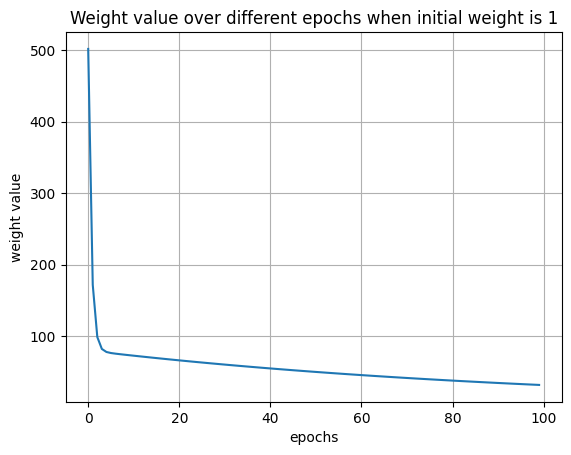

In [5]:
import matplotlib.pyplot as plt

print(w_val)

%matplotlib inline
plt.plot(w_val)
plt.title('Weight value over different epochs when initial weight is 1')
plt.xlabel('epochs')
plt.ylabel('weight value')
plt.grid('off')

In [6]:
w = list(model.get_weights().copy())
print(w)

update_weights(x,y,w,100)

model.fit(np.array(x), np.array(y), epochs=100, batch_size = 4, verbose=1)

model.get_weights()

[array([[0.39697492, 0.8289324 ],
       [0.55012786, 0.06192279]], dtype=float32), array([0., 0.], dtype=float32), array([[0.95566595],
       [0.42584562]], dtype=float32), array([0.], dtype=float32)]
Epoch 1/100


1/1 [==============================] - 1s 652ms/step - loss: 62.6319 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 62.3747 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 62.1869 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 62.0438 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 61.9314 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 61.8406 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 61.7659 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 61.70

[array([[0.4120812 , 0.8574911 ],
        [0.58034045, 0.11904001]], dtype=float32),
 array([0.01392321, 0.02214704], dtype=float32),
 array([[1.4708331],
        [0.9285902]], dtype=float32),
 array([0.5211832], dtype=float32)]